In [ ]:
# prompt: Create a machine learning model that can predict the genre of a
# movie based on its plot summary or other textual information. You
# can use techniques like TF-IDF or word embeddings with classifiers
# such as Naive Bayes, Logistic Regression, or Support Vector
# Machines.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Sample movie data (replace with your actual data)
data = {'plot': ['A thrilling action movie with car chases and explosions.',
                 'A heartwarming romantic comedy about two strangers.',
                 'A suspenseful mystery with unexpected twists.',
                 'A scary horror film with jump scares and ghosts.',
                 'A captivating science fiction movie about space travel.',
                 'A thrilling action movie with car chases and explosions.',
                 'A heartwarming romantic comedy about two strangers.',
                 'A suspenseful mystery with unexpected twists.'],
        'genre': ['Action', 'Romance', 'Mystery', 'Horror', 'Sci-Fi', 'Action', 'Romance', 'Mystery']}
df = pd.DataFrame(data)

# Preprocess the data
X = df['plot']
y = df['genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = clf.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Example prediction
new_plot = "A scary movie about a haunted house."
new_plot_tfidf = tfidf.transform([new_plot])
predicted_genre = clf.predict(new_plot_tfidf)[0]
print(f"Predicted genre for '{new_plot}': {predicted_genre}")


Accuracy: 1.0
Predicted genre for 'A scary movie about a haunted house.': Mystery


In [ ]:
import pandas as pd

# Function to parse each line
def parse_line(line):
    parts = line.strip().split(" ::: ")
    if len(parts) == 4:
        return {
            "id": int(parts[0]),
            "title": parts[1],
            "genre": parts[2],
            "plot": parts[3]
        }
    return None

# Read and parse file
train_data = []
with open("/content/train_data.txt", "r", encoding="utf-8") as file:
    for line in file:
        parsed = parse_line(line)
        if parsed:
            train_data.append(parsed)

# Create DataFrame
train_df = pd.DataFrame(train_data)
print(train_df.head())


   id                             title     genre  \
0   1      Oscar et la dame rose (2009)     drama   
1   2                      Cupid (1997)  thriller   
2   3  Young, Wild and Wonderful (1980)     adult   
3   4             The Secret Sin (1915)     drama   
4   5            The Unrecovered (2007)     drama   

                                                plot  
0  Listening in to a conversation between his doc...  
1  A brother and sister with a past incestuous re...  
2  As the bus empties the students for their fiel...  
3  To help their unemployed father make ends meet...  
4  The film's title refers not only to the un-rec...  


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Extract features and labels
X = train_df['plot']
y = train_df['genre']

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Train-test split for validation
X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Extract features and labels
X = train_df['plot']
y = train_df['genre']

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Train-test split for validation (if needed)
#X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier (or load your previous model if saved)
clf = MultinomialNB()  # This was likely the original model
clf.fit(X_tfidf, y)    # Re-train or use X_train, y_train if you split

# Now continue with your test data loading and prediction
# Load test data
test_plots = []
test_ids = []

with open("/content/test_data.txt", "r", encoding="utf-8") as file:
    for line in file:
        parts = line.strip().split(" ::: ")
        if len(parts) == 3:
            test_ids.append(int(parts[0]))
            test_plots.append(parts[2])

# Transform test plots using the same vectorizer
X_test_tfidf = vectorizer.transform(test_plots)

# Predict genres
test_predictions = clf.predict(X_test_tfidf)

# Save results
submission = pd.DataFrame({
    "id": test_ids,
    "predicted_genre": test_predictions
})

submission.to_csv("genre_predictions.csv", index=False)


In [ ]:
# Load labeled test data (like train data)
solution_data = []

with open("/content/test_data_solution.txt", "r", encoding="utf-8") as file:
    for line in file:
        parts = line.strip().split(" ::: ")
        if len(parts) == 4:
            solution_data.append({
                "id": int(parts[0]),
                "title": parts[1],
                "genre": parts[2],
                "plot": parts[3]
            })

# Create DataFrame
solution_df = pd.DataFrame(solution_data)
solution_df['id'] = solution_df['id'].astype(str)  # Ensure ID is str
#print(solution_df.head())


In [ ]:
# Transform the test plots using TF-IDF
X_test = vectorizer.transform(solution_df['plot'])

# Predict genres
predicted_genres = clf.predict(X_test)

# Add to solution_df
solution_df['predicted_genre'] = predicted_genres

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(solution_df['genre'], solution_df['predicted_genre']))
print(classification_report(solution_df['genre'], solution_df['predicted_genre']))


Accuracy: 0.5239483394833948


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      action       0.54      0.11      0.18      1314
       adult       0.50      0.06      0.11       590
   adventure       0.81      0.07      0.13       775
   animation       0.00      0.00      0.00       498
   biography       0.00      0.00      0.00       264
      comedy       0.51      0.42      0.46      7446
       crime       0.00      0.00      0.00       505
 documentary       0.57      0.87      0.69     13096
       drama       0.46      0.82      0.59     13612
      family       0.50      0.00      0.00       783
     fantasy       0.00      0.00      0.00       322
   game-show       0.98      0.32      0.48       193
     history       0.00      0.00      0.00       243
      horror       0.69      0.36      0.47      2204
       music       0.74      0.15      0.25       731
     musical       0.00      0.00      0.00       276
     mystery       0.00      0.00      0.00       318
        news       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC # Import LinearSVC

param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(LinearSVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Assuming you have a 'title' column in your DataFrame
from sklearn.pipeline import Pipeline

# Combine plot and title features
X = df[['plot', 'genre']]

# Create a pipeline with TF-IDF and classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('clf', LinearSVC())
])

# Train and evaluate the pipeline
# ... (similar to your existing code)

In [ ]:
# prompt: continue the remaining code

import pandas as pd
# Fit the best classifier to the entire training data
best_clf.fit(X_tfidf, y)

# Predict on the test data using the best classifier
predicted_genres_best = best_clf.predict(X_test)

# Create a submission DataFrame with the best classifier's predictions
submission_best = pd.DataFrame({
    "id": test_ids,
    "predicted_genre": predicted_genres_best
})

# Save the results to a CSV file
submission_best.to_csv("genre_predictions_best.csv", index=False)

# Evaluate the best classifier on the solution data
predicted_genres_best_solution = best_clf.predict(X_test)

# Add the predictions to the solution DataFrame
solution_df['predicted_genre_best'] = predicted_genres_best_solution

# Print the accuracy and classification report for the best classifier
print("Accuracy (Best Classifier):", accuracy_score(solution_df['genre'], solution_df['predicted_genre_best']))
print(classification_report(solution_df['genre'], solution_df['predicted_genre_best']))

X_train_text, X_val_text, y_train, y_val = train_test_split(
    X['plot'], X['genre'], test_size=0.2, random_state=42
)

pipeline.fit(X_train_text, y_train)  # Use raw text for fitting the pipeline
y_pred_pipeline = pipeline.predict(X_val_text)  # Use raw text for prediction
print(f"Pipeline accuracy: {accuracy_score(y_val, y_pred_pipeline)}")


Accuracy (Best Classifier): 0.580959409594096


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      action       0.48      0.26      0.34      1314
       adult       0.62      0.26      0.37       590
   adventure       0.62      0.15      0.25       775
   animation       0.48      0.06      0.11       498
   biography       0.00      0.00      0.00       264
      comedy       0.53      0.56      0.54      7446
       crime       0.37      0.02      0.04       505
 documentary       0.65      0.87      0.75     13096
       drama       0.54      0.77      0.64     13612
      family       0.56      0.07      0.12       783
     fantasy       0.57      0.05      0.09       322
   game-show       0.75      0.60      0.67       193
     history       0.00      0.00      0.00       243
      horror       0.60      0.61      0.60      2204
       music       0.64      0.46      0.53       731
     musical       0.29      0.01      0.03       276
     mystery       0.33      0.01      0.01       318
        news       0.73    

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv("/content/fraudTrain.csv")  # Update path if needed

# Basic EDA
print(df['Class'].value_counts())  # 0 = legitimate, 1 = fraud

# Features and Target
X = df.drop(['Class'], axis=1)
y = df['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

# --------------------------
# Logistic Regression Model
# --------------------------
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

print("\nLogistic Regression:")
print(classification_report(y_test, log_preds))

# --------------------------
# Decision Tree Model
# --------------------------
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)

print("\nDecision Tree:")
print(classification_report(y_test, tree_preds))

# --------------------------
# Random Forest Model
# --------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("\nRandom Forest:")
print(classification_report(y_test, rf_preds))

# --------------------------
# Confusion Matrix & Accuracy
# --------------------------
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))


KeyError: 'Class'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv("/content/fraudTrain.csv")  # Update path if needed

# Print the available columns to check for the correct target column name
print(df.columns)

# Basic EDA
# Replace 'Class' with the actual name of the target column from the output above
target_column_name = 'is_fraud'  # Example: Replace with the actual column name
print(df[target_column_name].value_counts())  # 0 = legitimate, 1 = fraud

# Features and Target
X = df.drop([target_column_name], axis=1)
y = df[target_column_name]

# Select only numerical features for scaling
numerical_features = X.select_dtypes(include=np.number).columns
X_numerical = X[numerical_features]

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

# Create a new DataFrame with scaled numerical features
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_features, index=X.index)

# Concatenate scaled numerical features with non-numerical features (if any)
X_processed = pd.concat([X_scaled_df, X.drop(columns=numerical_features)], axis=1)

# --- Handle datetime columns ---
# Assuming 'trans_date_trans_time' is the datetime column
# Convert to datetime objects and extract features
X_processed['trans_date_trans_time'] = pd.to_datetime(X_processed['trans_date_trans_time'])
X_processed['transaction_hour'] = X_processed['trans_date_trans_time'].dt.hour
X_processed['transaction_dayofweek'] = X_processed['trans_date_trans_time'].dt.dayofweek
# ... extract other relevant features (e.g., month, year) ...

# Drop the original datetime column
X_processed = X_processed.drop(columns=['trans_date_trans_time'])

X_processed = X_processed[y.notna()]
y = y[y.notna()]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, stratify=y, random_state=42)

# --------------------------
# Logistic Regression Model
# --------------------------
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

print("\nLogistic Regression:")
print(classification_report(y_test, log_preds))

# --------------------------
# Decision Tree Model
# --------------------------
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)

print("\nDecision Tree:")
print(classification_report(y_test, tree_preds))

# --------------------------
# Random Forest Model
# --------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("\nRandom Forest:")
print(classification_report(y_test, rf_preds))

# --------------------------
# Confusion Matrix & Accuracy
# --------------------------
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')
is_fraud
0.0    219433
1.0      1754
Name: count, dtype: int64


ValueError: time data "2019-04-22 03" doesn't match format "%Y-%m-%d %H:%M:%S", at position 221187. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Step 1: Load the data
# Added error_bad_lines=False to skip problematic lines
train_df = pd.read_csv('/content/fraudTrain.csv', on_bad_lines='skip')
test_df = pd.read_csv('/content/fraudTest.csv', on_bad_lines='skip')

# Step 2: Separate features and target
X_train = train_df.drop('is_fraud', axis=1)
y_train = train_df['is_fraud']
X_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud']

# Step 3: Preprocess data (handle datetime and categorical features)
def preprocess_data(df):
    # Convert 'trans_date_trans_time' to datetime and extract features
    # Using errors='coerce' to handle invalid date formats
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')
    df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
    df['transaction_dayofweek'] = df['trans_date_trans_time'].dt.dayofweek
    # ... extract other relevant datetime features if needed ...

    # Drop the original 'trans_date_trans_time' column
    df = df.drop(columns=['trans_date_trans_time'])

    # One-hot encode categorical features (if any) using pd.get_dummies()
    # Example:
    # categorical_features = ['category_column1', 'category_column2']
    # df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

    # Select only numerical features for scaling
    numerical_features = df.select_dtypes(include=['number']).columns
    df_numerical = df[numerical_features]

    return df_numerical

X_train_processed = preprocess_data(X_train)
X_test_processed = preprocess_data(X_test)

# Step 4: Impute missing values and Standardize numerical features
# Create an imputer to fill NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean') # Create SimpleImputer object

# Fit the imputer on the training data and transform both train and test data
X_train_imputed = imputer.fit_transform(X_train_processed) # Fit and transform training data
X_test_imputed = imputer.transform(X_test_processed) # Transform test data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed) # Scale imputed training data
X_test_scaled = scaler.transform(X_test_imputed) # Scale imputed test data

# --- Remove rows with NaN in y_train ---
# Before training, remove rows from X_train_scaled and y_train where y_train has NaN values
X_train_scaled = X_train_scaled[y_train.notna()]
y_train = y_train[y_train.notna()]

# --- Remove rows with NaN in y_test ---
# Before evaluating, remove rows from X_test_scaled and y_test where y_test has NaN values
X_test_scaled = X_test_scaled[y_test.notna()]
y_test = y_test[y_test.notna()] # Removing NaN values from y_test


# Step 5: Train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# Step 6: Evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Model: Logistic Regression
Accuracy: 0.995704663687943
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

Confusion Matrix:
[[553332    242]
 [  2145      0]]

Model: Decision Tree
Accuracy: 0.9288993178206971
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    553574
           1       0.02      0.42      0.04      2145

    accuracy                           0.93    555719
   macro avg       0.51      0.67      0.50    555719
weighted avg       0.99      0.93      0.96    555719

Confusion Matrix:
[[515308  38266]
 [  1246    899]]

Model: Random Forest
Accuracy: 0.9969283036930535
Classification Report:
             

<ipython-input-8-113bff0441f9>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


<Figure size 1200x800 with 0 Axes>

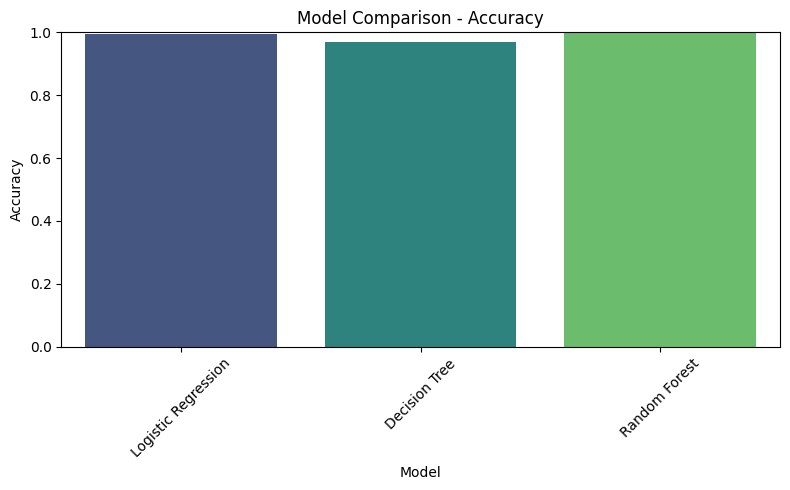

<ipython-input-8-113bff0441f9>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


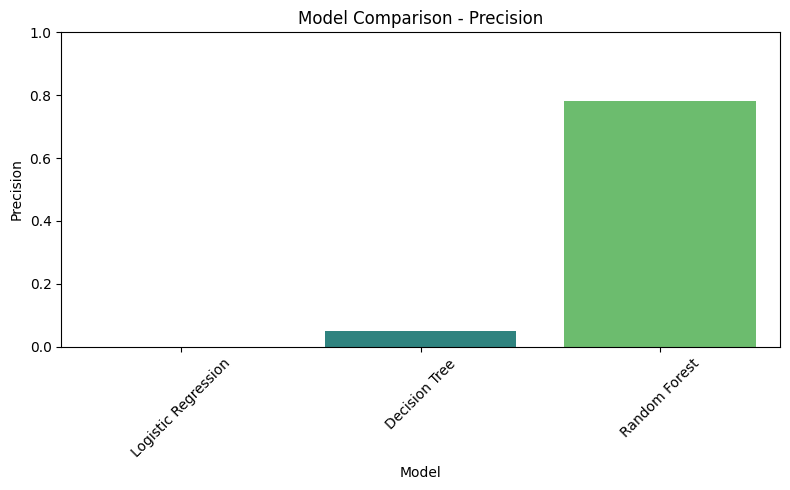

<ipython-input-8-113bff0441f9>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


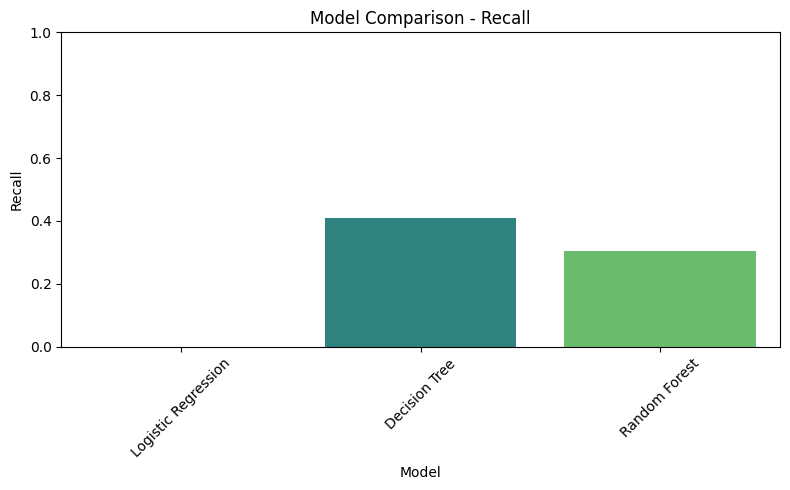

<ipython-input-8-113bff0441f9>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


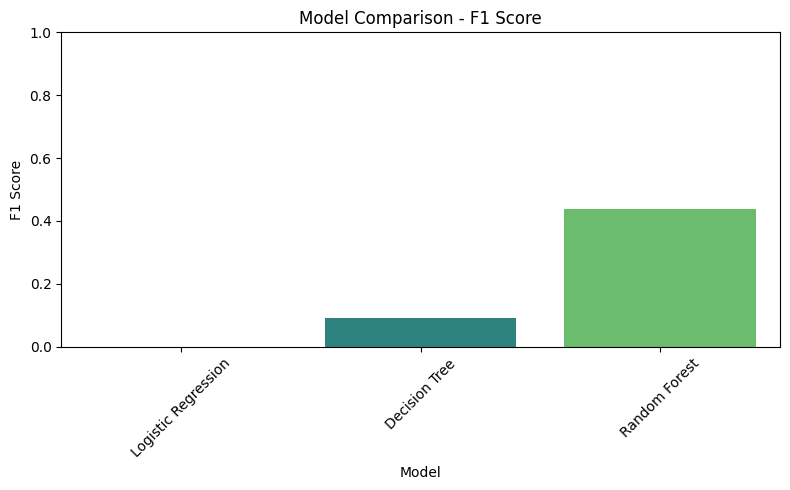

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

# Step 7: Collect performance metrics for plotting
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1 Score": f1_score(y_test, y_pred, zero_division=0)
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Step 8: Plot model comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(12, 8))
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
    plt.title(f'Model Comparison - {metric}')
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


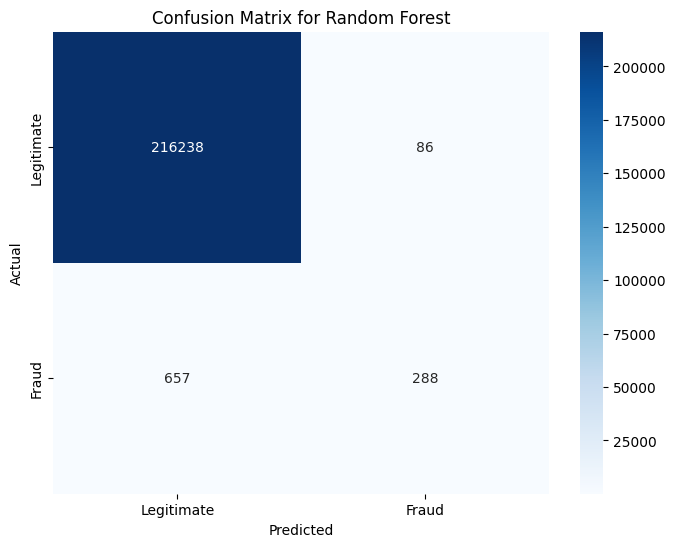

In [ ]:
# prompt: plot graph

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier

# Assuming 'X_test_scaled', 'y_test' are defined from the previous code
# Since 'rf_model' was not defined, we need to create and train it here
rf_model = RandomForestClassifier(n_estimators=100)  # Create the model
rf_model.fit(X_train_scaled, y_train)  # Assuming X_train_scaled, y_train are available from previous cell
rf_preds = rf_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, rf_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest")
plt.show()

In [ ]:
# prompt: compare model performance graphically

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score # Import accuracy_score
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
import pandas as pd # Import pandas
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.preprocessing import StandardScaler # Import StandardScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Load the data (if not already loaded)
# Added error_bad_lines=False to skip problematic lines
train_df = pd.read_csv('/content/fraudTrain.csv', on_bad_lines='skip')
test_df = pd.read_csv('/content/fraudTest.csv', on_bad_lines='skip')

# Separate features and target
X_train = train_df.drop('is_fraud', axis=1)
y_train = train_df['is_fraud']
X_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud']

# Preprocess data (if not already preprocessed)
def preprocess_data(df):
    # ... (Your preprocess_data function as before) ...

X_train_processed = preprocess_data(X_train)
X_test_processed = preprocess_data(X_test)

# Impute and scale (if not already done)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_processed)
X_test_imputed = imputer.transform(X_test_processed)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Remove NaN values from y_train and y_test (if not already done)
X_train_scaled = X_train_scaled[y_train.notna()]
y_train = y_train[y_train.notna()]
X_test_scaled = X_test_scaled[y_test.notna()]
y_test = y_test[y_test.notna()]


# Re-initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# Fit and evaluate models
model_names = list(models.keys())
accuracies = []

for name, model in models.items():
    # Fit each model before prediction
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))


# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)
plt.show()

IndentationError: expected an indented block after function definition on line 25 (<ipython-input-3-c615e4dee257>, line 28)